In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Solar Power Plant Data.csv")
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97.0,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98.0,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99.0,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,NaN,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67.0,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94.0,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95.0,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93.0,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92.0,0.0


In [22]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97.0,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98.0,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99.0,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,NaN,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8749 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8752 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8754 non-null   float64
 7   SystemProduction     8760 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 547.6+ KB


In [24]:
df.isnull().sum()

Date-Hour(NMT)          0
WindSpeed              11
Sunshine                0
AirPressure             8
Radiation               0
AirTemperature          0
RelativeAirHumidity     6
SystemProduction        0
dtype: int64

In [25]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8749.000000,8760.000000,8752.000000,8760.000000,8760.000000,8754.000000,8760.000000
mean,2.639736,11.180479,1010.358695,97.538493,6.978893,76.716929,684.746071
std,1.629111,21.171295,12.789175,182.336029,7.604266,19.280443,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [26]:
mean_value=df['WindSpeed'].mean()
df['WindSpeed'].fillna(value=mean_value, inplace=True)
mean_value

2.639735969825123

In [27]:
df.dropna(subset=['AirPressure'], inplace=True)
df.dropna(subset=['RelativeAirHumidity'], inplace=True)

In [28]:
df.isnull().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [29]:
print(df.duplicated())
print("_____________________________")
print(f"sum of duplicate= {df.duplicated().sum()}")

0       False
1       False
2       False
4       False
5       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8746, dtype: bool
_____________________________
sum of duplicate= 0


In [30]:
df.set_index("Date-Hour(NMT)", inplace=True)
print(f"Range of Datetime column: ({df.index.min()}) to ({df.index.max()})")
df.reset_index(inplace=True)

Range of Datetime column: (01.01.2017-00:00) to (31.12.2017-23:00)


In [31]:
# Changing Date-Hour(NMT) column type:
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format="%d.%m.%Y-%H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8746 entries, 0 to 8745
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date-Hour(NMT)       8746 non-null   datetime64[ns]
 1   WindSpeed            8746 non-null   float64       
 2   Sunshine             8746 non-null   int64         
 3   AirPressure          8746 non-null   float64       
 4   Radiation            8746 non-null   float64       
 5   AirTemperature       8746 non-null   float64       
 6   RelativeAirHumidity  8746 non-null   float64       
 7   SystemProduction     8746 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 546.8 KB


In [32]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df

""
0
1
2
3
4
...
8741
8742
8743
8744


In [33]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,0.6,0,1003.8,-7.4,0.1,97.0,0.0
1,1.7,0,1003.5,-7.4,-0.2,98.0,0.0
2,0.6,0,1003.4,-6.7,-1.2,99.0,0.0
3,4.0,0,1003.1,-6.3,3.6,67.0,0.0
4,1.4,0,1003.1,-6.8,1.5,74.0,0.0
...,...,...,...,...,...,...,...
8741,4.1,0,988.2,-4.8,-0.7,94.0,0.0
8742,2.1,0,987.3,-5.0,-0.3,95.0,0.0
8743,1.8,0,986.7,-5.3,0.2,93.0,0.0
8744,2.2,0,986.0,-5.4,0.3,92.0,0.0


In [34]:
print(df.columns)

Index(['Date-Hour(NMT)', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')


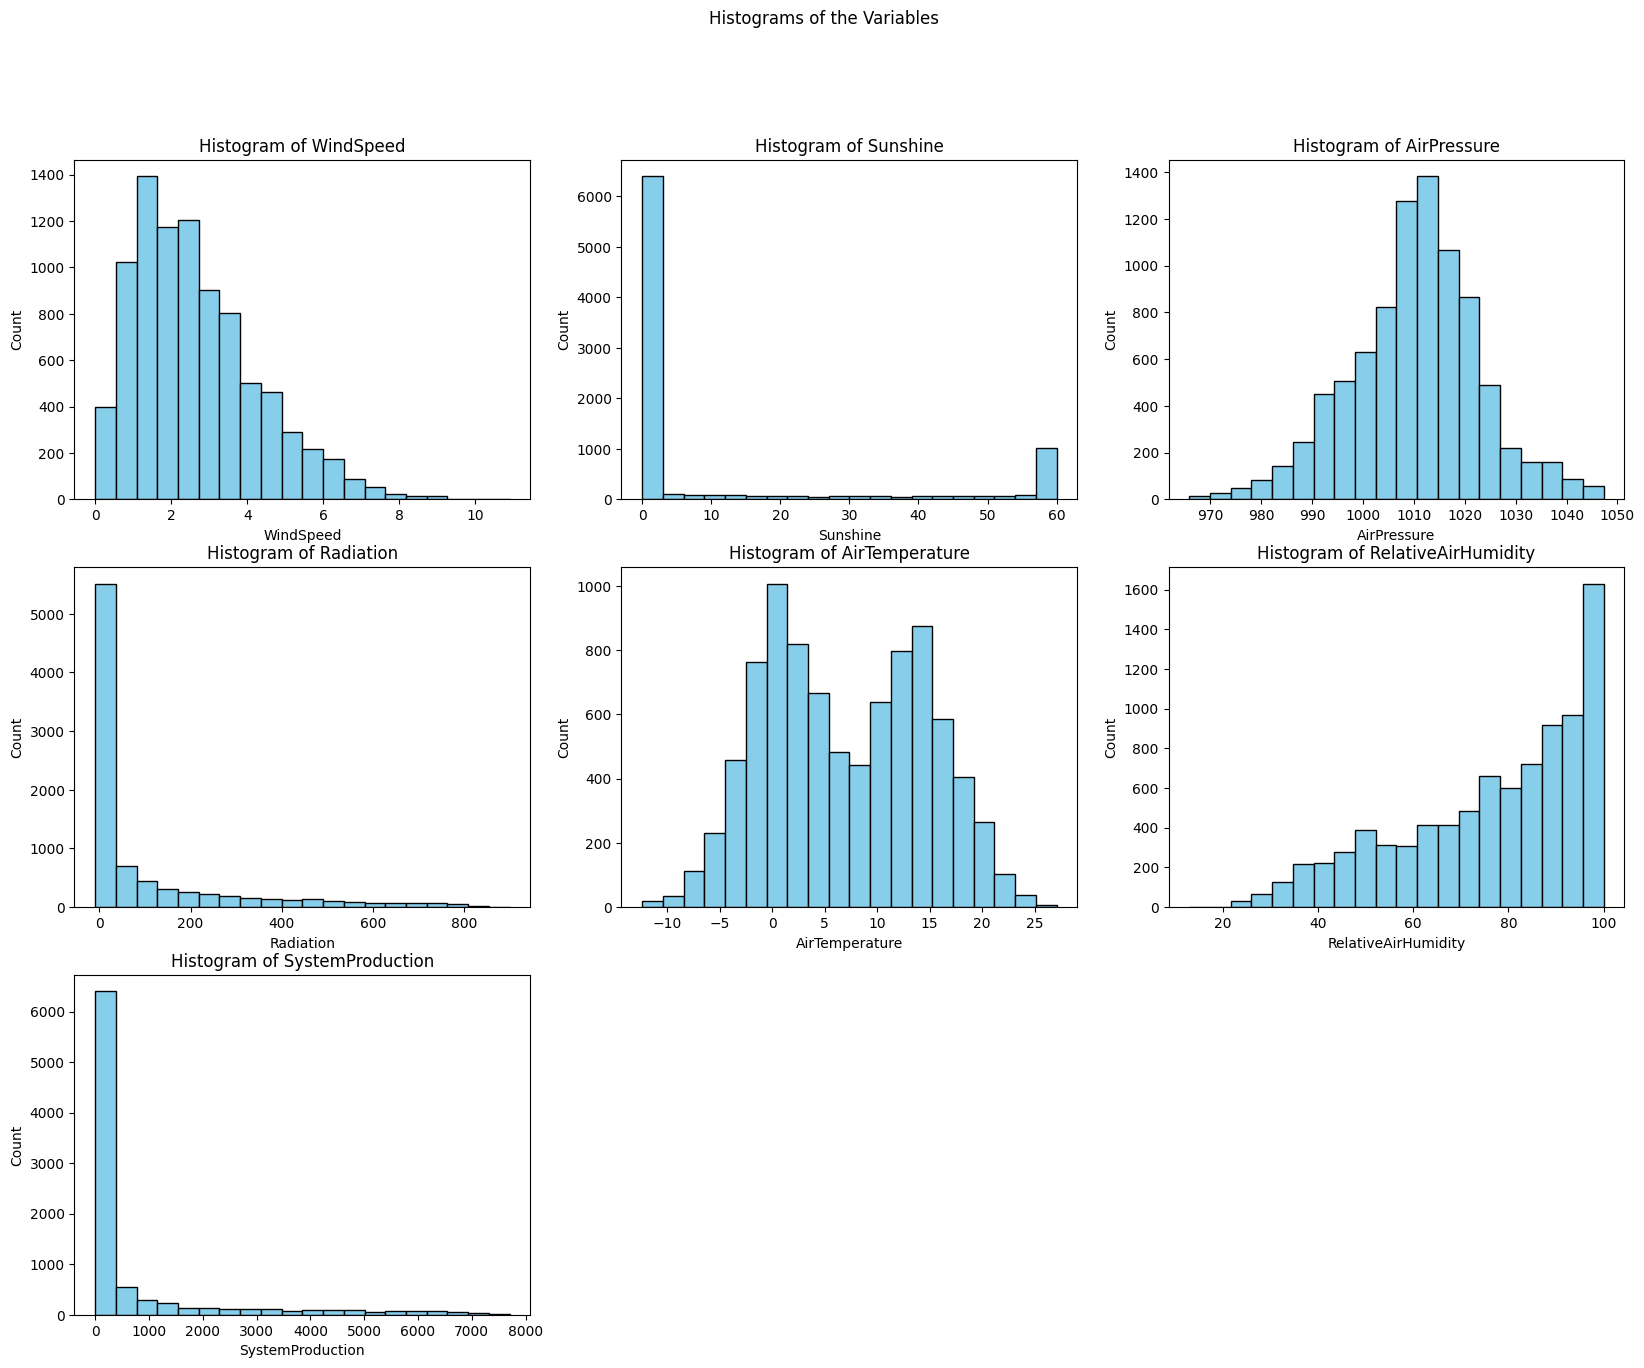

In [35]:
# (3x3)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle("Histograms of the Variables")


titles = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity', 'SystemProduction']

for i, var in enumerate(numerical_df):
    if i < 3:  #row 1
        row = 0
    elif i < 6:  # row 2
        row = 1
    else:   #row 3
        row = 2
    
    col = i % 3  #number of culumn
    
    # Histogram 
    axes[row, col].hist(df[var], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title('Histogram of '+ titles[i])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')

#Remove cells that are not used
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.show()

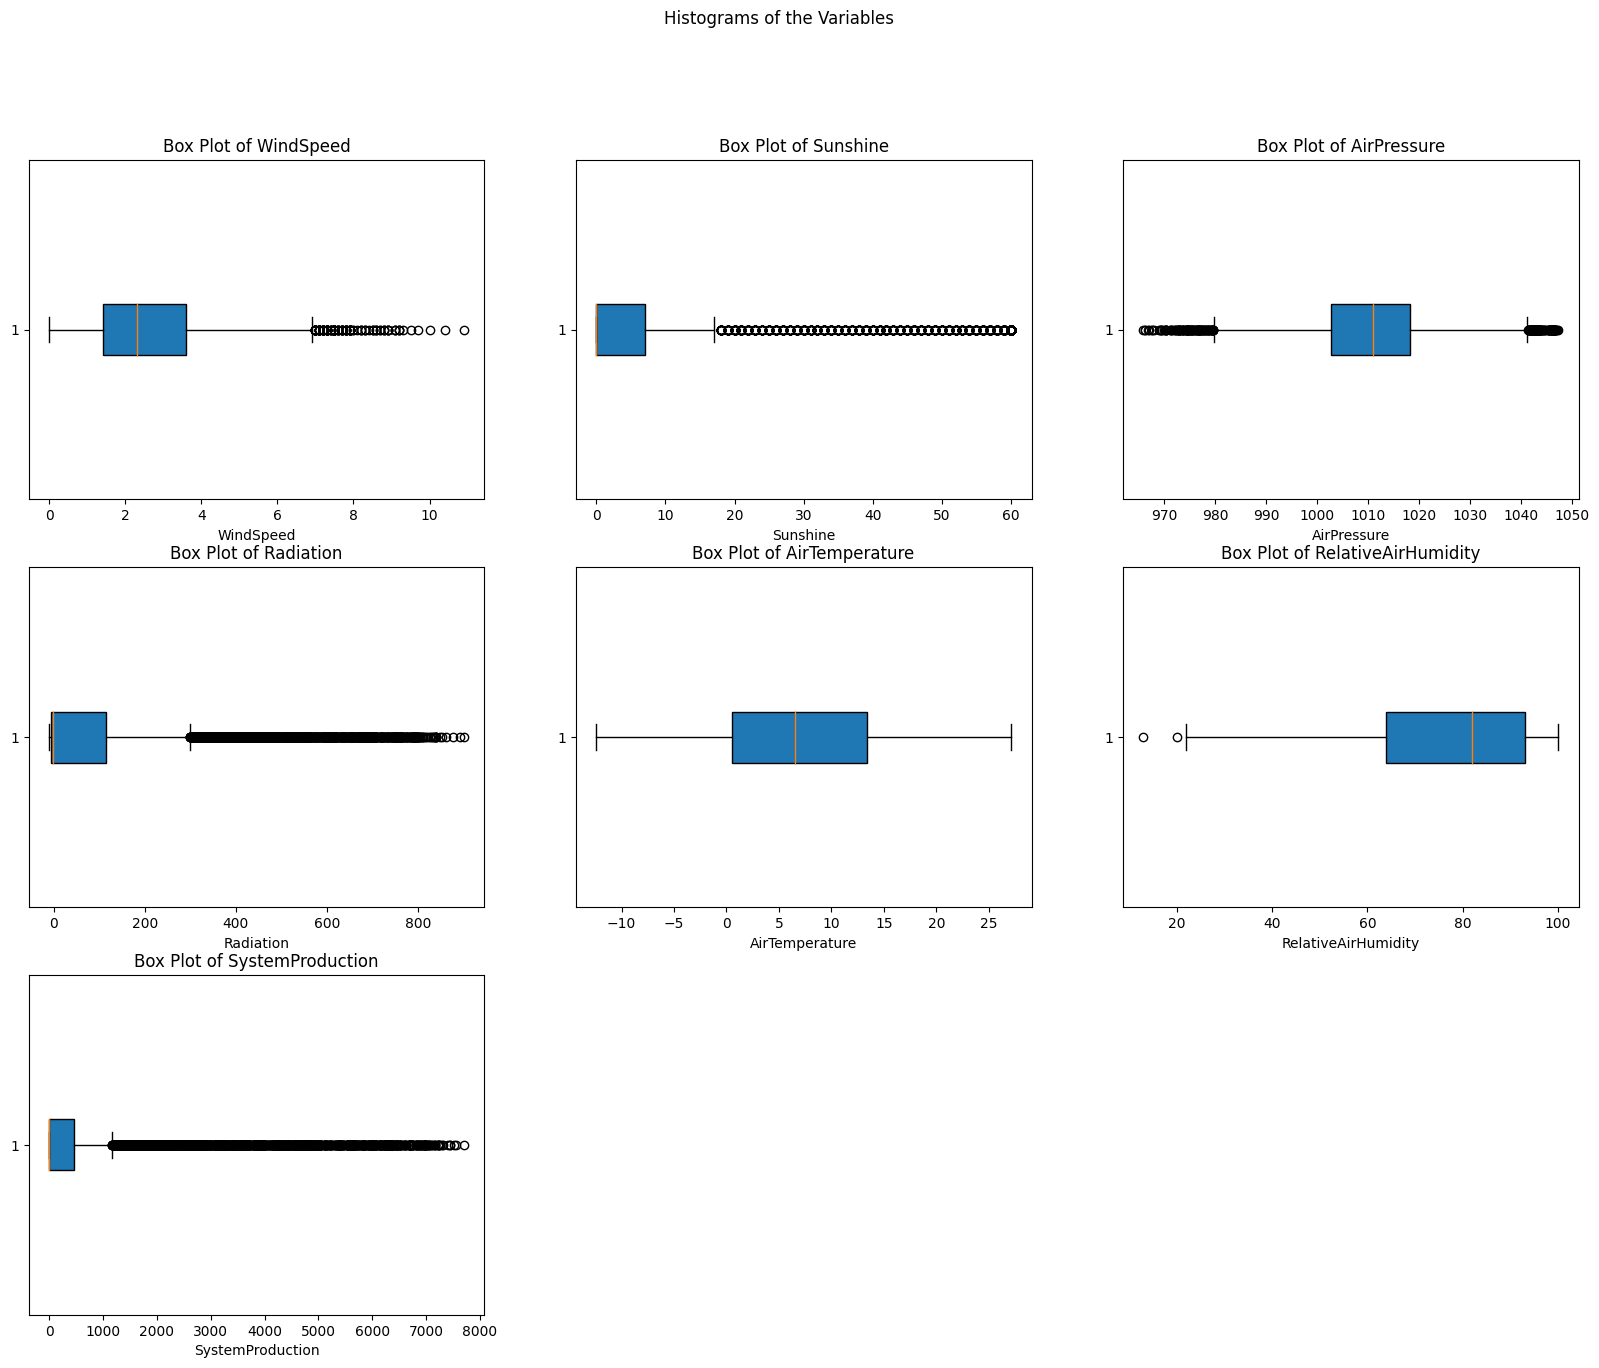

In [36]:
# (3x3)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle("Histograms of the Variables")


titles = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity', 'SystemProduction']

for i, var in enumerate(numerical_df):
    if i < 3:  #row 1
        row = 0
    elif i < 6:  # row 2
        row = 1
    else:   #row 3
        row = 2
    
    col = i % 3  #number of culumn
    
    # boxplot 
    axes[row, col].boxplot(df[var], vert=False, patch_artist=True)
    axes[row, col].set_title('Box Plot of '+ titles[i])
    axes[row, col].set_xlabel(var)

#Remove cells that are not used
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.show()

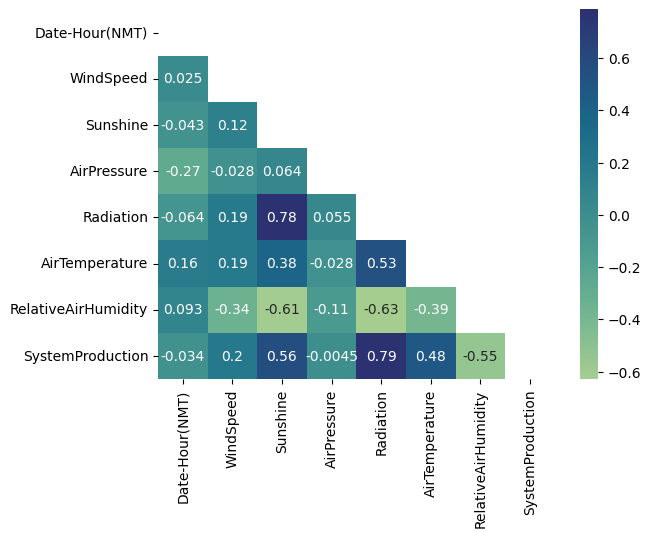

In [37]:
def heatmap_cor(df):
    cor = df.corr()
    mascara = np.zeros_like(cor)
    mascara[np.triu_indices_from(mascara)] = True
    sns.heatmap(cor, mask=mascara, cbar=True, annot=True, cmap="crest")
heatmap_cor(df)

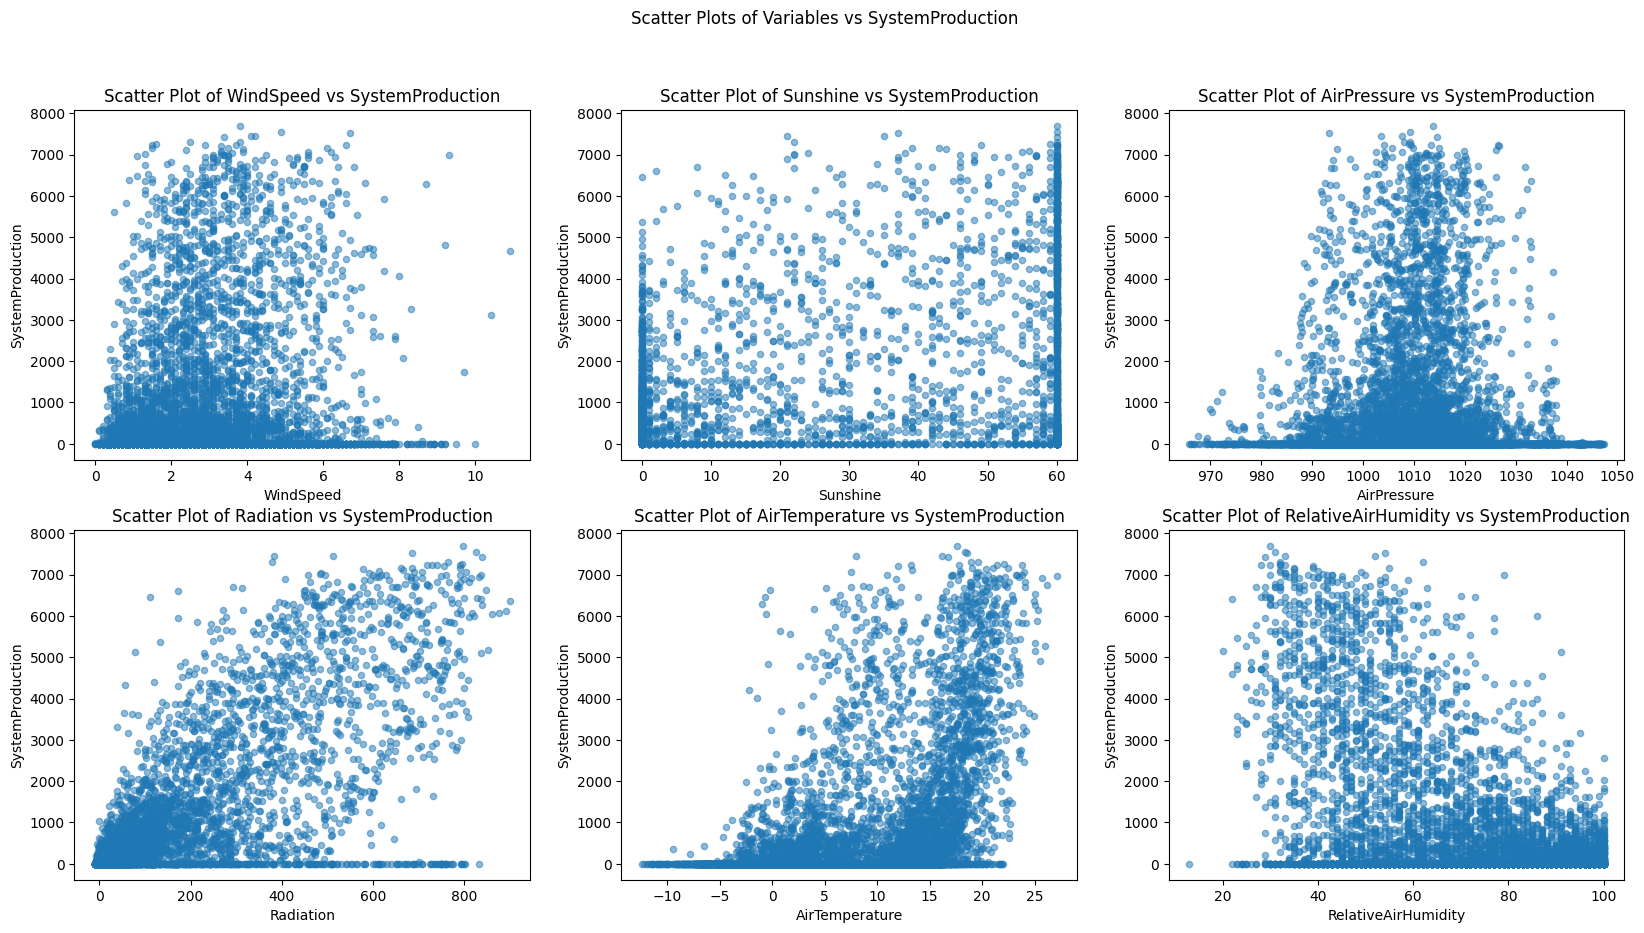

In [38]:
# (2x3)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Scatter Plots of Variables vs SystemProduction")

for i, var in enumerate(numerical_df):
    if i < 3:  # row 1
        row = 0
    else:  # row 2
        row = 1
    
    col = i % 3  # number of column
    
    # Scatter Plot
    if var != "SystemProduction":  # Avoid plotting the variable against itself
        axes[row, col].scatter(df[var], df["SystemProduction"], alpha=0.5, s=20)
        axes[row, col].set_title(f'Scatter Plot of {var} vs SystemProduction')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel("SystemProduction")

plt.show()